In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')

print(d_train.info())
print(d_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [5]:
df = d_train.append(d_test)
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [6]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [7]:
###Deep Cleaning

df_clean = df.copy()
df_clean = df_clean.drop('PassengerId', axis=1)

In [9]:
#age_1 = df_clean[df_clean['Age'] < 14]
#age_2 = df_clean[df_clean['Age'] > 14]
#age_1[age_1['Sex'] == 'male']
#df_clean['Age'] = np.where(df_clean['Age'] < 14, 1)
#df_clean['AgeGroup1'] = np.where(df_clean['Age']  14, 1, 0)

for i in df_clean.Age: 
    if i < 14:
        i.replace(1, inplace=True)
    elif 50 > i >= 14:
        i.replace(2, inplace=True)
    elif 80 >= i:
        i.replace(3, inplace=True)

df_clean.head()

AttributeError: 'numpy.float64' object has no attribute 'replace'

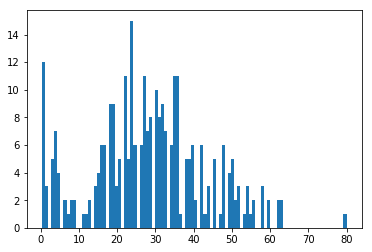

In [10]:
a = df_clean[df_clean['Survived'] == 1.0]
a = a[(a['Age'].notnull()) == True]
plt.hist(a['Age'], bins = 100);

In [11]:
age_null = df_clean[(df_clean['Age'].notnull()) == False]
age_null[age_null['Sex'] == 'male']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0,244373
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0.0,2631
29,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0.0,349216
36,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1.0,2677
42,NaN,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,3,male,0,0.0,349253
45,NaN,NaN,S,8.0500,"Rogers, Mr. William John",0,3,male,0,0.0,S.C./A.4. 23567
46,NaN,NaN,Q,15.5000,"Lennon, Mr. Denis",0,3,male,1,0.0,370371
48,NaN,NaN,C,21.6792,"Samaan, Mr. Youssef",0,3,male,2,0.0,2662
55,NaN,C52,S,35.5000,"Woolner, Mr. Hugh",0,1,male,0,1.0,19947


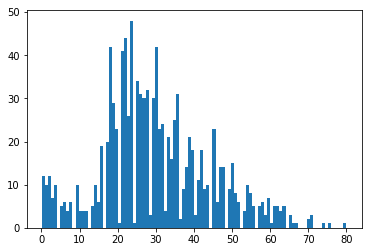

In [12]:
plt.hist(df_clean[(df_clean['Age'].notnull()) == True]['Age'], bins = 100);

In [16]:
df_clean.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [17]:
df_clean.groupby(['Fare', 'Sex'])['Survived'].mean()

Fare      Sex   
0.0000    male      0.066667
3.1708    male           NaN
4.0125    male      0.000000
5.0000    male      0.000000
6.2375    male      0.000000
6.4375    male      0.000000
6.4500    male      0.000000
6.4958    male      0.000000
6.7500    female    0.000000
          male      0.000000
6.8583    male      0.000000
6.9500    female         NaN
          male      0.000000
6.9750    male      0.500000
7.0000    female         NaN
          male           NaN
7.0458    male      0.000000
7.0500    male      0.000000
7.0542    male      0.000000
7.1250    male      0.000000
7.1417    male      1.000000
7.2250    female    1.000000
          male      0.100000
7.2292    female    1.000000
          male      0.153846
7.2500    female    1.000000
          male      0.000000
7.2833    female         NaN
7.3125    male      0.000000
7.4958    female    1.000000
                      ...   
133.6500  male      1.000000
134.5000  female    1.000000
          male           N

In [31]:
df_clean['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 162.7+ KB


In [ ]:
ship['Name'][0]
ship['Name'][0].split(",")

ship["Title"] = ship["Name"].apply(lambda x: x.split(", ")[1].split()[0])